In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X_train = np.load("mnist_train_data.npy") # La cantidad total de imágenes
Y_train = np.load("mnist_train_labels.npy")

print(f"Imagenes de entrenamiento: {X_train.shape}")
print(f"Número de clases: {np.unique(Y_train)}")

Imagenes de entrenamiento: (60000, 28, 28)
Número de clases: [0 1 2 3 4 5 6 7 8 9]


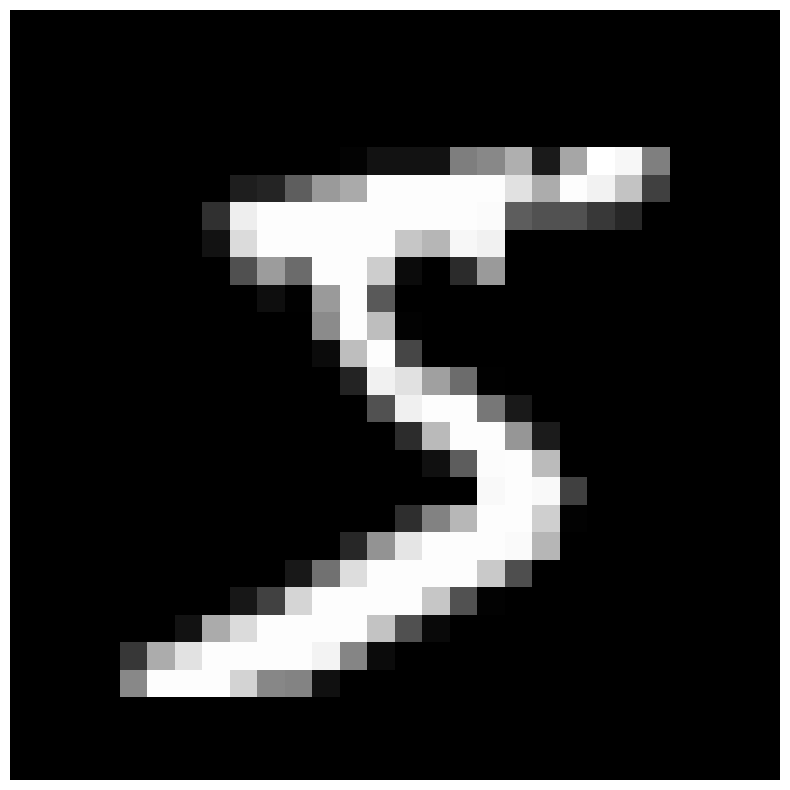

In [3]:
plt.figure(figsize=(10,10)) 
plt.imshow(X_train[0,:,:], cmap="gray") # Primer parámetor es el índice, en este caso la primer imágen
plt.axis("off") # Para que aparezcan las numeraciones en los ejes
plt.show() # Mostrar la imágen

In [4]:
# Crear un modelo secuencial correctamente
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(32,3, padding="same", strides=1, activation="relu"), # Empiricamente el profe dice que esta mejor comenzar con 32
    # El padding es para igualar el tamaño de la imágen de salida al de la imágen de entrada
    # El strinde de 1 es recomendable para clasificación
    keras.layers.MaxPooling2D(), # El valor del producto de cada matriz por el filtro que salga tomamos el mas grande
    keras.layers.Conv2D(64,3, padding="same", strides=1, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

# Imprimir el resumen del modelo
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 824,458 (3.15 MB)

 Trainable params: 824,458 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
X_train = np.expand_dims(X_train, axis=-1)
print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=20, batch_size=20)

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9006 - loss: 1.1016
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9778 - loss: 0.0770
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9835 - loss: 0.0569
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9845 - loss: 0.0515
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9885 - loss: 0.0400
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9900 - loss: 0.0343
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9903 - loss: 0.0336
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9916 - loss: 0.0305
Epoch 9/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9918 - loss: 0.0329
Epoch 10/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9933 - loss: 0.0244
Epoch 11/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9931 - loss: 0.0272
Epoch 12/20
3000/30

In [7]:
X_test = np.load("mnist_test_data.npy")
Y_test = np.load("mnist_test_labels.npy")

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
print(((predictions == Y_test).sum()/len(Y_test))*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
98.82
